<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/ML_Simple_Regression_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [3]:
df = pd.DataFrame(data=data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target

In [4]:

correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix['PRICE'])

Correlation Matrix:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64


In [5]:
best_attribute = correlation_matrix['PRICE'].idxmax(axis=0)
print(f"The attribute with the highest correlation with PRICE is: {best_attribute}")


The attribute with the highest correlation with PRICE is: PRICE


In [6]:
X = df[[best_attribute]].values
y = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
X_train_mean = np.mean(X_train_scaled)
y_train_mean = np.mean(y_train)


In [9]:
numerator = np.sum((X_train_scaled - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train_scaled - X_train_mean) ** 2)
beta_1_analytic = numerator / denominator
beta_0_analytic = y_train_mean - beta_1_analytic * X_train_mean

In [10]:
y_pred_analytic = beta_0_analytic + beta_1_analytic * X_test_scaled

In [11]:

SSE_analytic = np.sum((y_test - y_pred_analytic) ** 2)
SST = np.sum((y_test - np.mean(y_test)) ** 2)
R2_analytic = 1 - SSE_analytic / SST

In [12]:
print("Analytic Solution:")
print(f"Beta 0 (Intercept): {beta_0_analytic}")
print(f"Beta 1 (Slope): {beta_1_analytic}")
print(f"SSE: {SSE_analytic}")
print(f"R^2: {R2_analytic}")

Analytic Solution:
Beta 0 (Intercept): 22.112541254125414
Beta 1 (Slope): 2.743679870756823e-15
SSE: 3766919.597054973
R^2: -204.4666217372155


In [13]:
beta_0_gd = 0
beta_1_gd = 0
alpha = 0.001
epochs = 1000

In [14]:
for epoch in range(epochs):
    y_pred_gd = beta_0_gd + beta_1_gd * X_train_scaled
    error = y_pred_gd - y_train
    beta_0_gd -= alpha * (1/len(y_train)) * np.sum(error)
    beta_1_gd -= alpha * (1/len(y_train)) * np.sum(error * X_train_scaled)

In [15]:

y_pred_gd_test = beta_0_gd + beta_1_gd * X_test_scaled


In [16]:
SSE_gd = np.sum((y_test - y_pred_gd_test) ** 2)
R2_gd = 1 - SSE_gd / SST


In [17]:
print("\nGradient Descent Solution:")
print(f"Beta 0 (Intercept): {beta_0_gd}")
print(f"Beta 1 (Slope): {beta_1_gd}")
print(f"SSE: {SSE_gd}")
print(f"R^2: {R2_gd}")


Gradient Descent Solution:
Beta 0 (Intercept): 22.112541254125407
Beta 1 (Slope): -5.076980273665129e-16
SSE: 3766919.597054973
R^2: -204.4666217372155


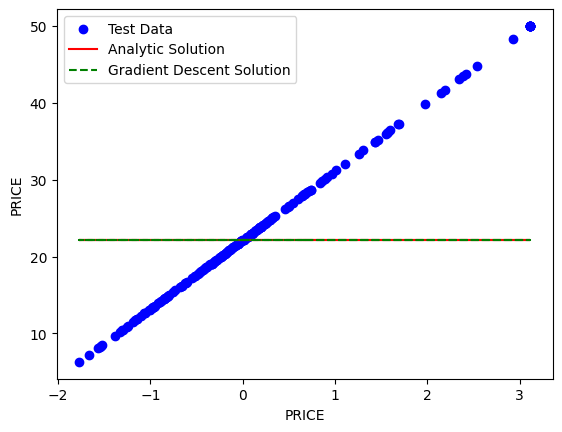

In [18]:
plt.scatter(X_test_scaled, y_test, color='blue', label='Test Data')
plt.plot(X_test_scaled, y_pred_analytic, color='red', label='Analytic Solution')
plt.plot(X_test_scaled, y_pred_gd_test, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel(best_attribute)
plt.ylabel('PRICE')
plt.legend()
plt.show()
